In [2]:
import os
os.getcwd()

'C:\\Users\\AbhilashMandadhi\\Desktop\\Data Sets'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
indata=pd.read_csv('insurance.csv')
indata

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
indata.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
indata.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [8]:
indata.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [9]:
X = indata[["bmi", "children"]]

In [10]:
y =indata["charges"]

In [11]:
mean_charges= indata['charges'].mean()
mean_charges

13270.422265141257

In [12]:
import statsmodels.api as sm
model1 = sm.OLS(y,X).fit()
predictions = model1.predict(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.566
Model:                            OLS   Adj. R-squared (uncentered):              0.565
Method:                 Least Squares   F-statistic:                              869.7
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                   1.30e-242
Time:                        21:30:31   Log-Likelihood:                         -14448.
No. Observations:                1338   AIC:                                  2.890e+04
Df Residuals:                    1336   BIC:                                  2.891e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bmi          408.1726     13.813     29.549      0.000     381.074     435.271
children     671.3584    265.236      2.531      0.011     151.034    1191.682
==============================================================================
Omnibus:                      261.266   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.564
Skew:                           1.298   Prob(JB):                     1.94e-94
Kurtosis:                       4.001   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

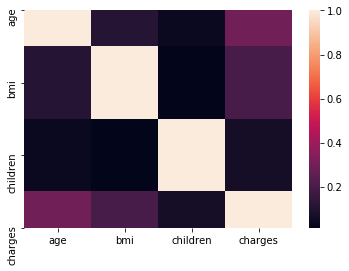

In [13]:
# Plot the correlation using heatmap
corr = indata.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state=1) 

In [15]:
X_train

,bmi,children
744,26.410,0
363,26.400,1
10,26.220,0
970,28.160,3
634,39.700,1
...,...,...
715,28.900,0
905,29.355,2
1096,34.960,2
235,22.220,2


In [16]:
y_train

744      8827.20990
363      2597.77900
10       2721.32080
970     10702.64240
634      9391.34600
           ...     
715     12146.97100
905      4564.19145
1096    44641.19740
235     19444.26580
1061    11554.22360
Name: charges, Length: 936, dtype: float64

In [17]:
features = X_train.iloc[:,:].values
features

array([[26.41,  0.  ],
       [26.4 ,  1.  ],
       [26.22,  0.  ],
       ...,
       [34.96,  2.  ],
       [22.22,  2.  ],
       [27.94,  1.  ]])

In [18]:
labels = y_train.iloc[:].values
labels

array([ 8827.2099  ,  2597.779   ,  2721.3208  , 10702.6424  ,
        9391.346   , 17878.90068 , 34838.873   , 28950.4692  ,
       11482.63485 ,  1704.70015 , 12430.95335 , 16115.3045  ,
        5662.225   , 11394.06555 ,  5003.853   ,  1964.78    ,
       13415.0381  ,  1967.0227  , 18963.17192 ,  8125.7845  ,
        3385.39915 ,  3577.999   ,  4889.0368  , 26125.67477 ,
        1241.565   ,  1708.0014  , 12495.29085 , 36898.73308 ,
       18767.7377  ,  1674.6323  ,  2166.732   ,  9249.4952  ,
        7160.094   , 10407.08585 , 14474.675   ,  2689.4954  ,
       14418.2804  , 17929.30337 , 11735.87905 ,  4883.866   ,
        5478.0368  , 20177.67113 ,  3659.346   ,  9850.432   ,
       23887.6627  ,  5855.9025  ,  7639.41745 ,  6393.60345 ,
       44501.3982  , 55135.40209 ,  4239.89265 ,  1622.1885  ,
       12233.828   , 39722.7462  , 35160.13457 ,  2395.17155 ,
        1748.774   ,  1639.5631  , 32548.3405  ,  2304.0022  ,
       37465.34375 , 43254.41795 , 46113.511   , 20984.

In [19]:
X=features
y=labels


In [20]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X,y)

In [21]:
predictions = model.predict(X)

In [22]:
accuracy= model.score(X,y)
accuracy

0.039412801270089615

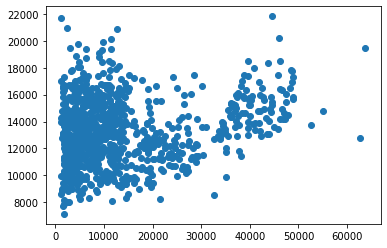

In [23]:
plt.scatter(y, predictions)

In [24]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score

# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print("\n")


import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)

print("The model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Slope: [392.29629491 338.90066393]
Intercept: 865.8072725260881


The model performance
--------------------------------------
RMSE is 11948.1392792252
R2 score is 0.039412801270089615




In [25]:
X = indata[["bmi", "children", "age"]]

In [26]:
y =indata["charges"]

In [27]:
mean_charges= indata['charges'].mean()
mean_charges

13270.422265141257

In [28]:
import statsmodels.api as sm
model1 = sm.OLS(y,X).fit()
predictions = model1.predict(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              655.7
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                   6.52e-262
Time:                        21:31:31   Log-Likelihood:                         -14400.
No. Observations:                1338   AIC:                                  2.881e+04
Df Residuals:                    1335   BIC:                                  2.882e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bmi          162.5084     28.007      5.802      0.000     107.566     217.451
children     407.6827    257.331      1.584      0.113     -97.135     912.501
age          205.5096     20.605      9.974      0.000     165.088     245.931
==============================================================================
Omnibus:                      369.789   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              750.403
Skew:                           1.648   Prob(JB):                    1.13e-163
Kurtosis:                       4.610   Cond. No.                         42.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state=1) 

In [31]:
X_train

,bmi,children,age
744,26.410,0,50
363,26.400,1,21
10,26.220,0,25
970,28.160,3,50
634,39.700,1,51
...,...,...,...
715,28.900,0,60
905,29.355,2,26
1096,34.960,2,51
235,22.220,2,40


In [32]:
features = X_train.iloc[:,:].values
features

array([[26.41,  0.  , 50.  ],
       [26.4 ,  1.  , 21.  ],
       [26.22,  0.  , 25.  ],
       ...,
       [34.96,  2.  , 51.  ],
       [22.22,  2.  , 40.  ],
       [27.94,  1.  , 57.  ]])

In [33]:
labels = y_train.iloc[:].values
labels

array([ 8827.2099  ,  2597.779   ,  2721.3208  , 10702.6424  ,
        9391.346   , 17878.90068 , 34838.873   , 28950.4692  ,
       11482.63485 ,  1704.70015 , 12430.95335 , 16115.3045  ,
        5662.225   , 11394.06555 ,  5003.853   ,  1964.78    ,
       13415.0381  ,  1967.0227  , 18963.17192 ,  8125.7845  ,
        3385.39915 ,  3577.999   ,  4889.0368  , 26125.67477 ,
        1241.565   ,  1708.0014  , 12495.29085 , 36898.73308 ,
       18767.7377  ,  1674.6323  ,  2166.732   ,  9249.4952  ,
        7160.094   , 10407.08585 , 14474.675   ,  2689.4954  ,
       14418.2804  , 17929.30337 , 11735.87905 ,  4883.866   ,
        5478.0368  , 20177.67113 ,  3659.346   ,  9850.432   ,
       23887.6627  ,  5855.9025  ,  7639.41745 ,  6393.60345 ,
       44501.3982  , 55135.40209 ,  4239.89265 ,  1622.1885  ,
       12233.828   , 39722.7462  , 35160.13457 ,  2395.17155 ,
        1748.774   ,  1639.5631  , 32548.3405  ,  2304.0022  ,
       37465.34375 , 43254.41795 , 46113.511   , 20984.

In [34]:
X=features
y=labels


In [35]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X,y)

In [36]:
predictions = model.predict(X)

In [37]:
accuracy= model.score(X,y)
accuracy

0.11770834190185464

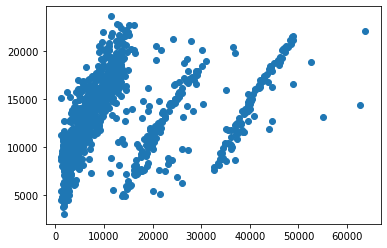

In [38]:
plt.scatter(y, predictions)

In [39]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score

# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print("\n")


import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)

print("The model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Slope: [324.44646251 289.43311157 245.08803916]
Intercept: -6512.731840706985


The model performance
--------------------------------------
RMSE is 11450.85632857136
R2 score is 0.11770834190185464


